In [1]:
import numpy as np
import PIL
from PIL import Image
import matplotlib.pyplot as plt
import os

In [2]:
print('Installed Pillow Version:', PIL.__version__)

Installed Pillow Version: 9.1.1


In [3]:
# Début du programme : Identification du fichier
liste = [file.lower() for file in os.listdir('data/photos')]
Fichier = False
while not Fichier:
    nom = input('Nom personne : ')
    nomFichier = nom.lower() + '.jpg'
    if nomFichier in liste:
        Fichier = True
        print('')
    else:
        print("Fichier jpg absent pour cette personne")
nomFichier = 'data/photos/' + nomFichier

Nom personne : Pierre18



Type : JPEG
Taille (width, height) : (254, 257)
Mode : RGB


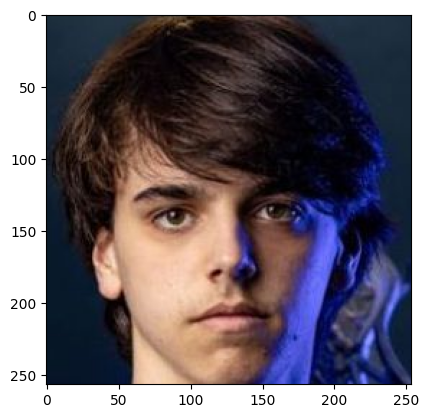

In [4]:
# Visualisation de l'image
image_in = Image.open(nomFichier)
width, height = image_in.size
if width > height:
    image_in = Image.open(nomFichier).rotate(270, expand=True)
    width, height = image_in.size
print("Type : " + str(image_in.format))
print("Taille (width, height) : " + str(image_in.size))
print("Mode : " + str(image_in.mode))
plt.imshow(image_in)

In [5]:
Retournement = False
while not Retournement:
    Tourne = input("Retourner l'image (y/n) : ")
    if Tourne in ["Y", 'y']:
        image_in = image_in.rotate(90, expand=True)
        plt.imshow(image_in)
        plt.show()
    else:
        Retournement = True

Retourner l'image (y/n) : n


In [6]:
# Recadrage et redimensionnement de l'image en carré
def recadrage(image):
    recadre_w = input("Décalage horizontal : ")
    recadre_h = input("Décalage vertical : ")
    recadre_w = int(recadre_w)
    recadre_h = int(recadre_h)
    area = image_in.crop((recadre_w, recadre_h, width, width + recadre_h - recadre_w))
    print(area.size)
    plt.imshow(area)
    plt.show()
    return area

Décalage horizontal : 0
Décalage vertical : 0
(254, 254)


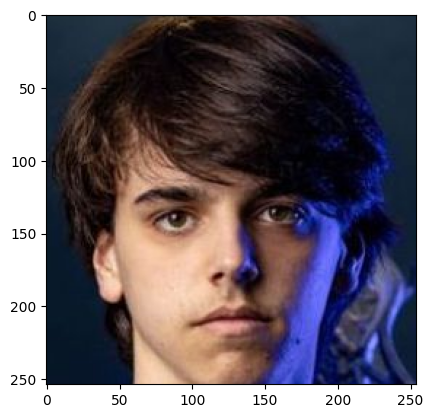

Satisfait (Y/N) ? y


In [7]:
#Boucle de choix du meilleur recadrage
resultat = False
while not resultat:
    area = recadrage(image_in)
    satisfait = input("Satisfait (Y/N) ? ")
    if satisfait in ('Y','y'):
        resultat = True

(48, 48)


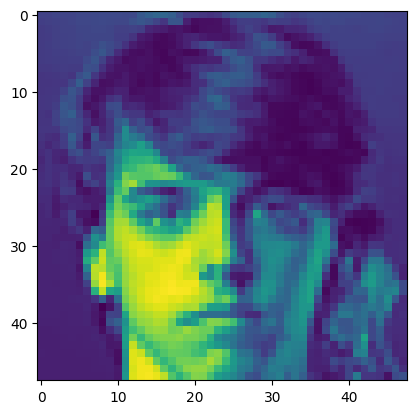

In [8]:
# Conversion de l'image en noir et blanc
image1 = area.convert(mode='L')
# Réduction de la taille de l'image
image2 = image1.resize((48,48))
print(image2.size)
plt.imshow(image2)

<class 'numpy.ndarray'>
(48, 48)


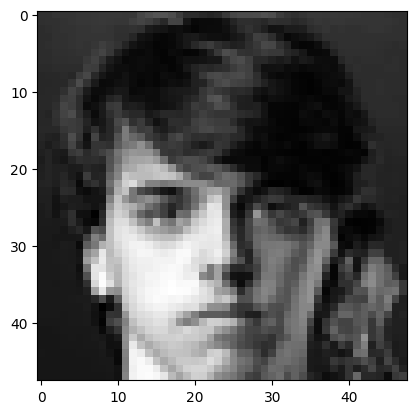

In [9]:
# Transformation de l'image en Numpy Array et vérification
img = np.asarray(image2)
print(type(img))
print(img.shape)
plt.imshow(img, cmap="gray")

In [10]:
# Sauvegarde de l'image mise aux normes
output = 'data/photos_normees/' + nom + '_np'
np.save(output, image2)
print('Photo normalisée sauvegardée')

Photo normalisée sauvegardée
